#conda install -c plotly plotly

In [1]:
# This code calculates the KGE and other stats for comparing EFAS output with observed flow timeseries
import pandas as pd
import numpy as np
from numpy.random import rand
import plotly.express as px
import matplotlib
from calendar import monthrange
from datetime import datetime
# Using graph_objects
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plot
from plotly.subplots import make_subplots
pd.plotting.register_matplotlib_converters()
import plotly.io as pio
pio.renderers.default = "browser"

In [2]:
EfasSel = pd.read_excel('Dis24_Chosen_2009-2015.xlsx', index_col=0)
#station = stations.sample(n=1) # We can randomly choose a station
#EfasSel.set_index('Date', inplace=True)

ObsSel = pd.read_excel('Agi_Chosen_2009-2015.xlsx', index_col=0)
#station = stations.sample(n=1) # We can randomly choose a station
#ObsSel.set_index('Date', inplace=True)

EfasInfo = pd.read_excel('Chosen_2009_ 2015.xlsx', index_col=0)

## Calculate Signatures
Stats = pd.DataFrame()
StatsCalc = pd.DataFrame()

In [3]:
# FDC Signatures
# Sort observed and simulated flows

ObsSelSort = ObsSel.apply(lambda x: x.sort_values(ascending=False).values)
EfasSelSort = EfasSel.apply(lambda x: x.sort_values(ascending=False).values)
leng=len(EfasSelSort)
EfasSelSort['Ind'] = range(1, leng+1)
EfasSelSort['Ind'] = EfasSelSort['Ind'].div(leng)
EfasSelSort.set_index('Ind', inplace=True)
ObsSelSort['Ind'] = range(1, leng+1)
ObsSelSort['Ind'] = ObsSelSort['Ind'].div(leng)
ObsSelSort.set_index('Ind', inplace=True)

ObsSelSortNorm = ObsSelSort.copy()
EfasSelSortNorm = EfasSelSort.copy()

In [4]:
# Normalize by watershed area
for pg in ObsSelSort.columns:
    areas = float(EfasInfo.area[(EfasInfo['stname'] == pg)])
    ObsSelSortNorm[pg] = 1000*(ObsSelSort[pg] / (areas*1000000)) #  convert km2 to m2 than to mm
    EfasSelSortNorm[pg] = 1000*(EfasSelSort[pg] / (areas*1000000))

IndexError: index 34 is out of bounds for axis 0 with size 34

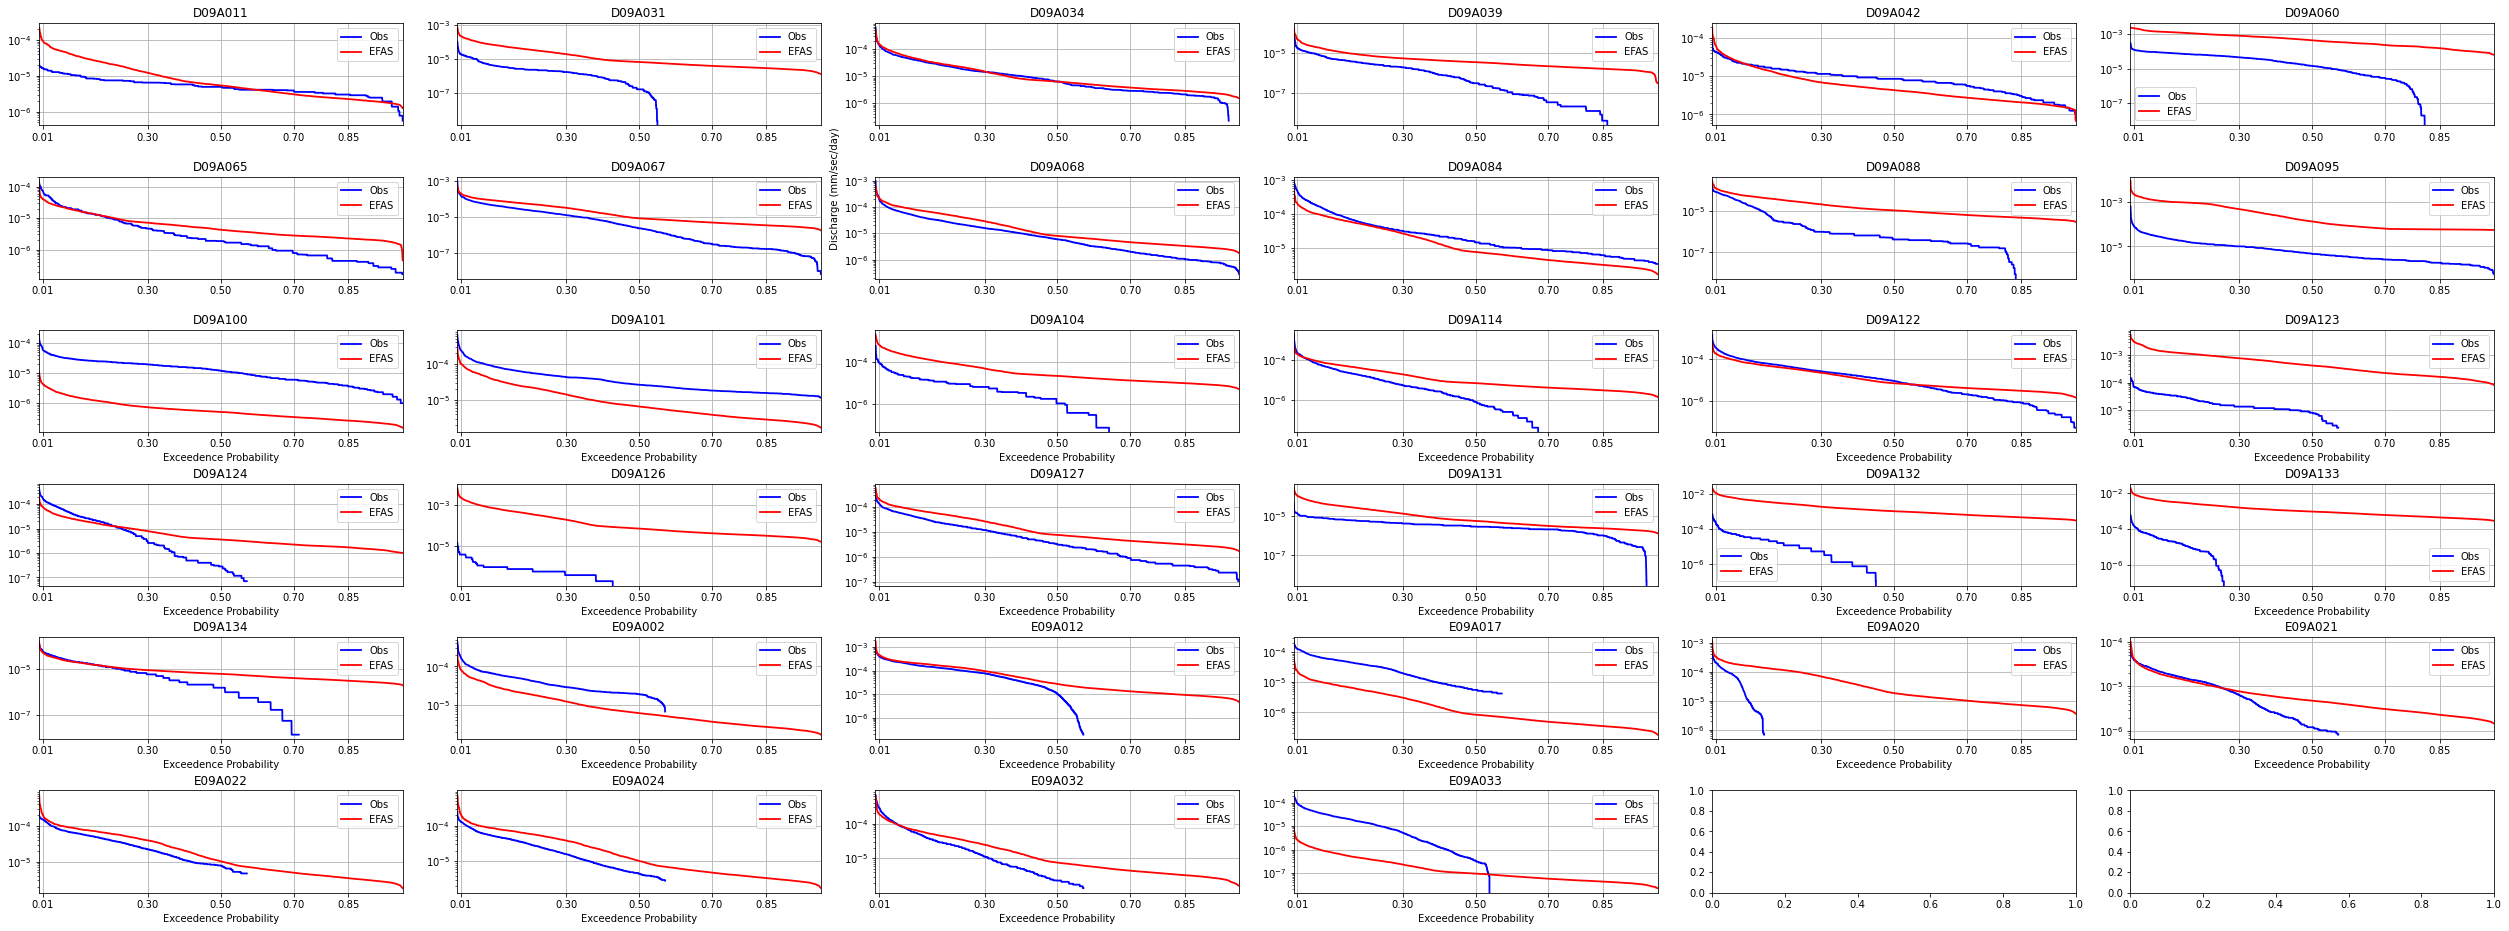

In [5]:
# Plot FDCs
fig, axs = plot.subplots(6,6, figsize=(44, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.15)
axs = axs.ravel()
for i in range(36):
    axs[i].plot(ObsSelSort.columns[i], data=ObsSelSortNorm,  linestyle='-', color='blue', linewidth=1.8, label='Obs')
    axs[i].plot(ObsSelSort.columns[i], data=EfasSelSortNorm,  linestyle='-', color='red', linewidth=1.8, label='EFAS')
    axs[i].set_yscale('log')
    axs[i].set_title(str(ObsSelSort.columns[i]))
    axs[i].set_xticks([0.01, 0.3, 0.5, 0.7, 0.85])
    axs[i].grid()
    axs[i].set_xlim(left=0, right=1)
    axs[i].legend()
    if i == 8:
        axs[i].set_ylabel('                         Discharge (mm/sec/day)', fontsize=10)
    if i > 11:
        axs[i].set_xlabel('Exceedence Probability', fontsize=10)

fig.savefig('FDC_Obs_Sim_Antalya.png')
fig.show()


In [7]:
# Define FDC thresholds
H5 = round(0.01 * len(ObsSelSortNorm)) + 1
H30 = round(0.30 * len(ObsSelSortNorm)) + 1
H50 = round(0.50 * len(ObsSelSortNorm)) + 1
H70 = round(0.70 * len(ObsSelSortNorm)) + 1
H85 = round(0.85 * len(ObsSelSortNorm)) + 1

In [8]:
for pg in ObsSel.columns:
    TSSel = pd.DataFrame()
    TSSel = pd.concat([EfasSelSortNorm[pg], ObsSelSortNorm[pg]], axis=1, ignore_index=True, sort=False)
    TSSel = TSSel.rename(columns={0: "Sim", 1: "Obs"})
    leng = len(TSSel)
    TSSel['Ind'] = range(0, leng )
    TSSel.set_index('Ind', inplace=True)
    # For observed values
    TSSel["H5Obs"] = np.log10(TSSel['Obs'][H5])
    TSSel["H50Obs"] = np.log10(TSSel['Obs'][H50])
    TSSel["H85Obs"] = np.log10(TSSel['Obs'][H85])
    TSSel["HSLObs"] = np.log10(TSSel['Obs'][H30]) - np.log10(TSSel['Obs'][H70])
    # For sim values
    TSSel["H5Sim"] = np.log10(TSSel['Sim'][H5])
    TSSel["H50Sim"] = np.log10(TSSel['Sim'][H50])
    TSSel["H85Sim"] = np.log10(TSSel['Sim'][H85])
    TSSel["HSLSim"] = np.log10(TSSel['Sim'][H30]) - np.log10(TSSel['Sim'][H70])

    StatsCalc = TSSel.iloc[0]
    StatsCalc["Station"] = pg

    Stats = Stats.append(StatsCalc)

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp/ipykernel_2572/1469442873.py:11: RuntimeWarning:

divide by zero encountered in log10

C:\Users\PC\AppData\Local\Temp/ipykernel_2572/1469442873.py:12: RuntimeWarning:

divide by zero encountered in log10

C:\Users\PC\AppData\Local\Temp/ipykernel_2572/1469442873.py:10: RuntimeWarning:

divide by zero encountered in log10



C:\Users\PC\anaconda3\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning:

invalid value encountered in subtract



ValueError: array must not contain infs or NaNs

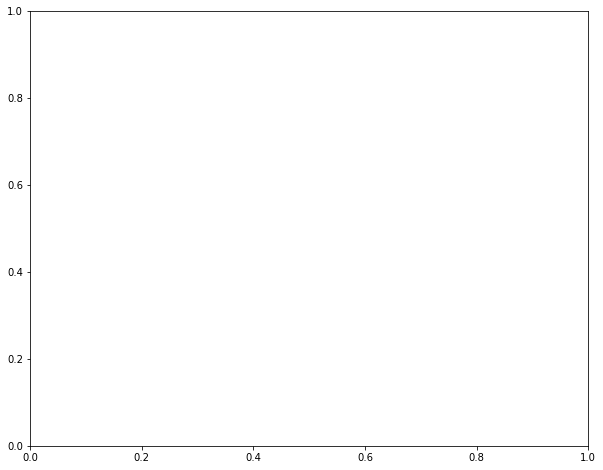

In [10]:
# Export Stats
Stats.to_excel('Stats_Antalya.xlsx')
StatsMeltedObs = Stats.melt(id_vars='Station', value_vars=["H5Obs", "H50Obs", "H85Obs", "HSLObs" ])
StatsMeltedSim = Stats.melt(id_vars='Station', value_vars=["H5Sim", "H50Sim", "H85Sim", "HSLSim" ])
StatsMeltedObs["Type"] = "Observed Flow"
StatsMeltedSim["Type"] = "EFAS Simulated Flow"
StatsMeltedObs['variable'] = StatsMeltedObs['variable'].map(lambda x: x.rstrip('Obs'))
StatsMeltedSim['variable'] = StatsMeltedSim['variable'].map(lambda x: x.rstrip('Sim'))

StatsMelted = pd.concat([StatsMeltedObs, StatsMeltedSim], ignore_index=True)
fig, axv = plot.subplots(figsize=(10,8))
axv = sns.violinplot(x="variable", y="value", hue="Type", data=StatsMelted, palette="Set2", split=True,
                    scale="count", inner="quartile")
axv.grid()
axv.legend(loc=2,prop={'size':14})
labels = [item.get_text() for item in axv.get_xticklabels()]
labels = ['High Flow','Median Flow','Low Flow','FDC Slope']
axv.set_xticklabels(labels, fontsize=14)
axv.set_title('FLOW SIGNATURES FOR THE WATERSHEDS IN ANTALYA BASIN', fontsize=16)
axv.set_ylabel('Signature Value (Log10)', fontsize=14)
axv.set_xlabel('Flow Signatures', fontsize=14)
fig.show()
fig.savefig('FDC_Signatures_Antalya.png')

In [11]:
print(StatsMelted)

     Station variable     value                 Type
0    D09A011       H5 -4.785862        Observed Flow
1    D09A031       H5 -4.733124        Observed Flow
2    D09A034       H5 -3.855226        Observed Flow
3    D09A039       H5 -4.786408        Observed Flow
4    D09A042       H5 -4.371559        Observed Flow
..       ...      ...       ...                  ...
267  E09A021      HSL  0.395444  EFAS Simulated Flow
268  E09A022      HSL  0.904659  EFAS Simulated Flow
269  E09A024      HSL  0.897270  EFAS Simulated Flow
270  E09A032      HSL  0.741890  EFAS Simulated Flow
271  E09A033      HSL  0.597988  EFAS Simulated Flow

[272 rows x 4 columns]


C:\Users\PC\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PC\AppData\Local\Temp/ipykernel_2572/161077989.py:41: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



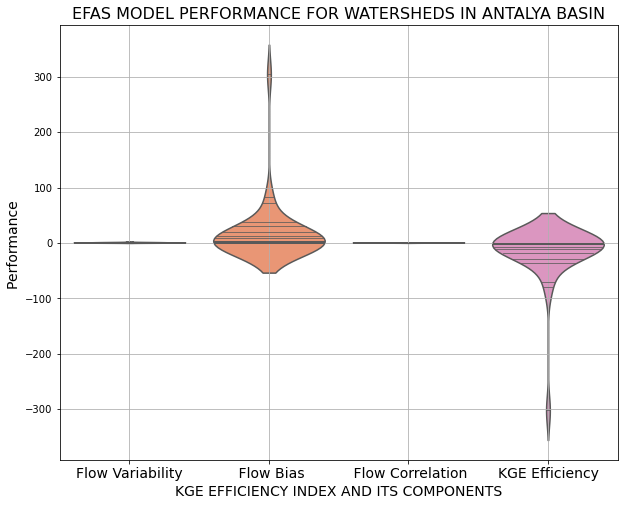

In [12]:
##KGE and Components
KGE = pd.DataFrame()
KGECalc = pd.DataFrame()
for pg in ObsSel.columns:
    TSSel = pd.DataFrame()
    TSSel = pd.concat([EfasSel[pg], ObsSel[pg]], axis=1, ignore_index=True, sort=False)
    TSSel = TSSel.rename(columns={0: "Sim", 1: "Obs"})
    # Calculate KGE Components
    TSSel["MeanObs"] = TSSel["Obs"].mean()
    TSSel["MeanSim"] = TSSel["Sim"].mean()

    TSSel["StdObs"] = TSSel["Obs"].std() / TSSel["MeanObs"]
    TSSel["StdSim"] = TSSel["Sim"].std() / TSSel["MeanSim"]

    TSSel["Alpha"] = TSSel["StdSim"] / TSSel["StdObs"]
    TSSel["Beta"] = TSSel["MeanSim"] / TSSel["MeanObs"]

    TSSel["Corr"] = TSSel["Sim"].corr(TSSel["Obs"])
    TSSel["KGE"] = 1 - ((TSSel["Corr"] - 1)**2 + (TSSel["Alpha"] - 1)**2 + (TSSel["Beta"] - 1)**2)**0.5
    KGECalc = TSSel.iloc[0]
    KGECalc["Station"] = pg

    KGE = KGE.append(KGECalc)

# Export KGE
KGE.to_excel('Stats_KGE_Antalya.xlsx')

# Plot KGE and Components
KGEMelted = KGE.melt(id_vars='Station', value_vars=["Alpha", "Beta", "Corr", "KGE"])

fig, axv = plot.subplots(figsize=(10,8))
axv = sns.violinplot(x="variable", y="value", data=KGEMelted, palette="Set2", split=True,
                    scale="count", inner="stick")
axv.grid()
labels = [item.get_text() for item in axv.get_xticklabels()]
labels = ['Flow Variability',' Flow Bias',' Flow Correlation','KGE Efficiency']
axv.set_xticklabels(labels, fontsize=14)
axv.set_title('EFAS MODEL PERFORMANCE FOR WATERSHEDS IN ANTALYA BASIN', fontsize=16)
axv.set_ylabel('Performance ', fontsize=14)
axv.set_xlabel('KGE EFFICIENCY INDEX AND ITS COMPONENTS', fontsize=14)
fig.show()
fig.savefig('KGE_Components_Antalya.png')